# 🎨 Stable Diffusion Inpainting Demo

This notebook shows how to use Stable Diffusion to inpaint parts of an image using a mask.


## 📝 Overview

This notebook walks through the process of **inpainting**—modifying specific parts of an image based on a mask and a text prompt—using the `StableDiffusionInpaintPipeline`.

You'll learn how to:
- Load image and mask inputs
- Apply inpainting to replace or modify image regions
- Generate artistic edits guided by natural language prompts


In [5]:
!pip install diffusers transformers accelerate safetensors Pillow matplotlib --quiet

In [6]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16
).to("cuda" if torch.cuda.is_available() else "cpu")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### 🖼️ Load Image and Mask

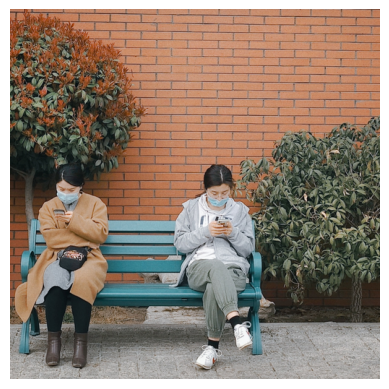

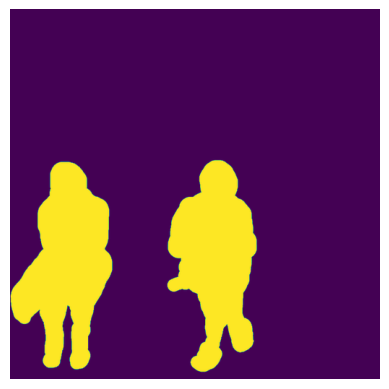

In [7]:
import matplotlib.pyplot as plt

# Valid image and mask from CompVis
url_image = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/billow926-12-Wc-Zgx6Y.png"
url_mask  = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/billow926-12-Wc-Zgx6Y_mask.png"

image = Image.open(requests.get(url_image, stream=True).raw).convert("RGB").resize((512, 512))
mask  = Image.open(requests.get(url_mask, stream=True).raw).convert("L").resize((512, 512))

image.save("inpainting_input.png")
mask.save("inpainting_mask.png")

plt.imshow(image)
plt.axis("off")
plt.show()

plt.imshow(mask)
plt.axis("off")
plt.show()

### 🧠 Run Inpainting

  0%|          | 0/50 [00:00<?, ?it/s]

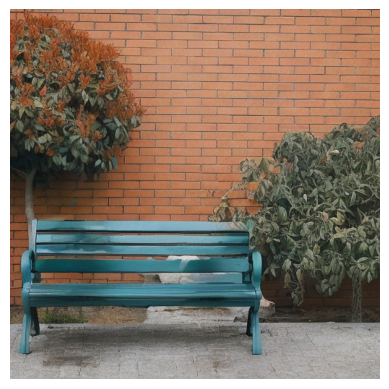

In [8]:
prompt = "A beautiful green landscape replacing the masked area"
output = pipe(prompt=prompt, image=image, mask_image=mask).images[0]
output.save("inpainting_output.png")

plt.imshow(output)
plt.axis("off")
plt.show()


## ✅ Summary

You’ve learned how to use inpainting to fill in or modify parts of an image using Stable Diffusion and masks. This is a powerful way to create content-aware edits or enhancements.
